In [1]:
import arviz

import numpy as np
import matplotlib.pyplot as plt

from cmdstanpy import CmdStanModel, set_cmdstan_path

from pathlib import Path

set_cmdstan_path("/home/maw501/cmdstan")

In [2]:
model = CmdStanModel(stan_file="stan_models/censored_example.stan")

INFO:cmdstanpy:compiling stan program, exe file: /home/maw501/ML/maw501_github/BDA_py_demos/demos_ch8/stan_models/censored_example
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/maw501/ML/maw501_github/BDA_py_demos/demos_ch8/stan_models/censored_example


In [3]:
N = 1000
y = np.random.normal(25, 5, size=N)
upper_limit = int(np.quantile(y, q=0.9))
censored = y > upper_limit
N_cens = sum(censored)
N_obs = int(N - N_cens)

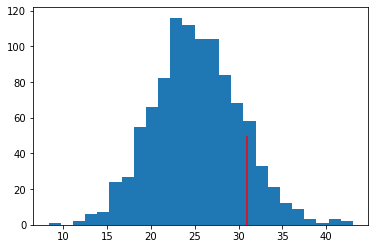

In [4]:
plt.hist(y, bins=25)
plt.vlines(upper_limit, 0, 50, color="red");

In [5]:
stan_data = {
    "N_obs": int(N_obs),
    "N_cens": int(N_cens),
    "y_obs": y[~censored],
    "U": upper_limit,
}

In [6]:
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

In [7]:
fit = model.sample(
    data=stan_data,
    output_dir=output_dir,
    iter_warmup=1000,
    iter_sampling=1_000,
)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [8]:
params = fit.stan_variables()

In [9]:
arviz_inf = arviz.convert_to_inference_data(fit)
summary_df = (
    arviz.summary(arviz_inf)
    .reset_index()
    .rename(columns={"index": "parameter"})
)

In [10]:
summary_df

,parameter,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
0,theta,25.201,0.156,24.913,25.510,0.003,0.002,2800.0,2798.0,2818.0,2203.0,1.0
1,sigma,4.919,0.123,4.682,5.142,0.002,0.001,3438.0,3438.0,3429.0,2610.0,1.0


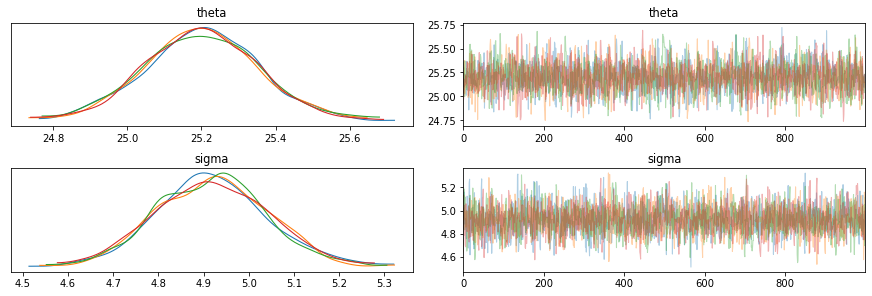

In [11]:
arviz.plot_trace(fit);

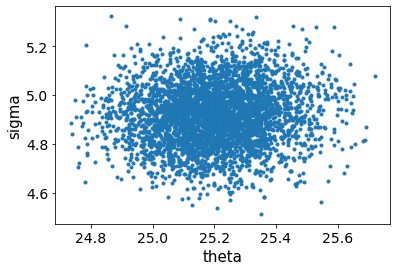

In [12]:
arviz.plot_pair(fit);